In [5]:
import os
import string
import numpy as np

In [6]:
X=[] # input data
Y=[] # label class
for category in os.listdir("20_newsgroups"):
    for document in os.listdir("20_newsgroups/"+category):
        X.append((document,open("20_newsgroups/"+category+"/"+document).read()))
        Y.append(category)


In [7]:
# search on google u get list on stopwords  
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

In [8]:
from sklearn import model_selection 


In [9]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)

In [10]:
# make list of vacobalory...
vocab={}
for i in range(len(X_train)):
    for word in X_train[i][1].split():
        word_new =word.strip(string.punctuation).lower()
        if(len(word_new)>2) and (word_new not in stopwords):
            if(word_new in vocab):
                vocab[word_new]+=1
            else:
                vocab[word_new]=1

In [11]:
import matplotlib.pyplot as plt

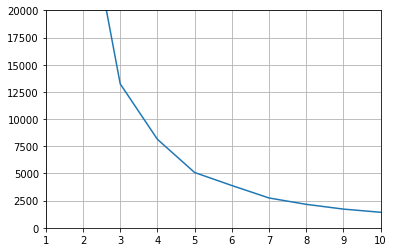

In [12]:
num_words=[0 for i in range(max(vocab.values())+1)]
freq=[ i for i in range(max(vocab.values())+1)]
for key in vocab:
    num_words[vocab[key]]+=1
plt.plot(freq,num_words)
plt.axis([1,10,0,20000])
plt.grid()
plt.show()


In [13]:
# cut off the unused words
cutoff_freq=100
total_words_after_cutoff=len(vocab)-sum(num_words[0:cutoff_freq])
print(total_words_after_cutoff)

3385


In [14]:
# make the list of features
features=[]
for key in vocab:
    if(vocab[key]>=cutoff_freq):
        features.append(key)

In [15]:
# Now make input 2d train_data
X_train_datasets = np.zeros((len(X_train),len(features)))
for i in range(len(X_train)):
    word_list=[word.strip(string.punctuation).lower() for word in X_train[i][1].split()]
    for word in word_list:
        if(word in features):
            X_train_datasets[i][features.index(word)]+=1   

In [16]:
# Now make input 2d test_data
X_test_datasets = np.zeros((len(X_test),len(features)))
for i in range(len(X_test)):
    word_list=[word.strip(string.punctuation).lower() for word in X_test[i][1].split()]
    for word in word_list:
        if(word in features):
            X_test_datasets[i][features.index(word)]+=1   

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [18]:
# using inbuild naive bayes multinomial type b/c text classification depends on freq of word so we use multinomial so that's why we use multi(i.e freq count)
clf = MultinomialNB()
clf.fit(X_train_datasets,Y_train)
Y_test_pred = clf.predict(X_test_datasets)
print("Train_score:",clf.score(X_train_datasets,Y_train))
print("Test_score:",clf.score(X_test_datasets,Y_test))
print("classification_report")
print(classification_report(Y_test,Y_test_pred))

Train_score: 0.8994465559778623
Test_score: 0.8556
classification_report
                          precision    recall  f1-score   support

             alt.atheism       0.75      0.79      0.77       233
           comp.graphics       0.77      0.77      0.77       253
 comp.os.ms-windows.misc       0.85      0.81      0.83       249
comp.sys.ibm.pc.hardware       0.80      0.85      0.83       240
   comp.sys.mac.hardware       0.82      0.93      0.87       236
          comp.windows.x       0.91      0.82      0.86       240
            misc.forsale       0.79      0.87      0.83       261
               rec.autos       0.89      0.91      0.90       269
         rec.motorcycles       0.88      0.96      0.92       284
      rec.sport.baseball       0.98      0.97      0.98       248
        rec.sport.hockey       0.97      0.98      0.98       231
               sci.crypt       0.96      0.89      0.93       233
         sci.electronics       0.88      0.86      0.87       244
  

In [36]:
#implementation from scratch
class MultinomialNativeBayes:
    
    def __init__(self):
        self.dict={}
        self.classes=None
        
    def fit(self,X_train,Y_train):
        self.classes = set(Y_train)
        for class1 in self.classes:
            self.dict[class1]={}
            for i in range(len(X_train[0])):
                self.dict[class1][i]=0
            self.dict[class1]['total']=0
        self.dict['total_points']=len(X_train)
    
        for i in range(len(X_train)):
            for j in range(len(X_train[0])):
                self.dict[Y_train[i]][j]+=X_train[i][j]
            self.dict[Y_train[i]]['total']+=1
    
    
    
    def probability(self,test_point,class1):
        # log b/c of small value get justified..
        log_prob = np.log(self.dict[class1]['total'])-np.log(self.dict['total_points'])
        total_word =len(test_point)
        for i in range(len(test_point)):
            curr_prob=test_point[i]*(np.log(self.dict[class1][i]+1)-np.log(self.dict[class1]['total']+total_word))
            # use laplace correction so that result will not be zero any more
            log_prob += curr_prob   
                            
    
        return log_prob
                                     
    def predictSinglePoint(self,test_point):
        
        best_class=None
        best_prob=None
        first_run=True
        
        for class1 in self.classes:
            log_probability= self.probability(test_point,class1)
            if(first_run or log_probability>best_prob):
                best_class=class1
                best_prob=log_probability
                first_run=False
        return best_class
    
    def predict(self,X_test):
        
        Y_pred=[]
        for i in range(len(X_test)):
            Y_pred.append(self.predictSinglePoint(X_test[i]))
                          
        return Y_pred 
    
    def score(self,Y_pred,Y_true):
        cont=0
        for i in range(len(Y_pred)):
            if(Y_pred[i]==Y_true[i]):
                cont+=1
                
        return cont/len(Y_pred)        
                          

In [38]:
clf2 = MultinomialNativeBayes()
clf2.fit(X_train_datasets,Y_train)
Y_test_pred= clf2.predict(X_test_datasets)

print("Test_score:",clf2.score(Y_test_pred,Y_test))
print("classification_report")
print(classification_report(Y_test,Y_test_pred))

Test_score: 0.7682
classification_report
                          precision    recall  f1-score   support

             alt.atheism       0.78      0.76      0.77       233
           comp.graphics       0.76      0.76      0.76       253
 comp.os.ms-windows.misc       0.93      0.64      0.76       249
comp.sys.ibm.pc.hardware       0.78      0.82      0.80       240
   comp.sys.mac.hardware       0.99      0.75      0.85       236
          comp.windows.x       0.69      0.91      0.79       240
            misc.forsale       0.91      0.57      0.70       261
               rec.autos       0.94      0.69      0.79       269
         rec.motorcycles       1.00      0.62      0.76       284
      rec.sport.baseball       0.99      0.83      0.91       248
        rec.sport.hockey       0.96      0.96      0.96       231
               sci.crypt       0.66      0.90      0.77       233
         sci.electronics       0.92      0.65      0.76       244
                 sci.med       0.9